In [1]:
import pandas as pd 
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,15)})

%matplotlib inline
%config InlineBackend.figure_format='png'

In [2]:
#data1 = pd.read_csv('./data/prad_Liu_FPKM_1.5CPMcutoff.csv')
data2 = pd.read_csv('./data/prad_Liu_FPKM_2CPMcutoff.csv')
data2.index += 1

# Mixing the databases generated by the model and the existing one

In [3]:
cluster_2 = pd.read_csv("posteriors_and_label.csv", index_col=0).add_prefix('cl2_')
cluster_3 = pd.read_csv("posteriors_and_label_3_comp.csv", index_col=0).add_prefix('cl3_')

In [4]:
data2 = pd.concat([data2,cluster_2, cluster_3], axis = 1)

In [5]:
data2.head(10)

gene      C42_1       C42_2       C42_3      C42B_1     C42B_2  \
1   ENSG00000000003   6.540650    4.959669    9.217752   23.459223   6.884049   
2   ENSG00000000419  67.261810  110.493986  202.293720   87.942791   5.637718   
3   ENSG00000000457  16.635584    2.952401   17.684040  118.923467   4.137576   
4   ENSG00000000460   4.765569   40.527364  158.414266    8.043746   5.668570   
5   ENSG00000001036  31.498590  157.167492  483.071782   21.329285  44.157482   
6   ENSG00000001084  17.959980    9.313914  100.262194  279.075624  17.108444   
7   ENSG00000001167   8.356406   77.488321  110.383901   96.016037  63.197157   
8   ENSG00000001460   2.273332    0.748578   31.531733    2.434710   4.252939   
9   ENSG00000001461   7.812570   82.042461   37.198727  158.870540  22.339752   
10  ENSG00000001497  23.066854   44.056135  159.418889   35.986369  28.592919   

         C42B_3     LNCAP_1     LNCAP_2    LNCAP_3     MR49F_1     MR49F_2  \
1    629.026470   25.990813   12.565353   8.225953   23.277251  132.531960   
2    550.182832  310.479154  112.624614   5.875149  196.104103  278.451662   
3    219.333380   24.108856   38.465615   3.948556   39.484847   63.953983   
4    226.717240   43.935512   56.790532  20.824250   34.785556   39.652450   
5   2170.452721  116.768622  187.364644  21.636449  107.637190  111.884620   
6    874.828153   35.534175   16.336884   8.228693   94.893501  173.373380   
7    721.408245  105.919785   61.433567  47.618273  204.623834   83.119050   
8     64.544570    5.661824   33.354295   2.284588   14.901557    9.795837   
9    519.355549  177.168524   99.936557   8.776652   94.238082   92.813816   
10   969.367525   76.986527   40.045468   8.825552  389.312320  523.756918   

       MR49F_3     cl2_prob1  cl2_prob2  cl2_label     cl3_prob1  \
1    17.922204  3.029746e-05   0.999970          0  5.557492e-08   
2    60.050169  4.704742e-15   1.000000          0  6.770338e-20   
3    51.051127  3.667996e-06   0.999996          0  1.855668e-09   
4    53.495471  2.623566e-07   1.000000          0  4.837011e-10   
5   180.889571  2.609448e-15   1.000000          0  3.031595e-30   
6   107.429329  1.893806e-11   1.000000          0  1.186683e-14   
7    42.635126  2.232114e-12   1.000000          0  7.706642e-16   
8     8.036671  9.993001e-01   0.000700          1  1.523641e-03   
9    77.465002  2.220116e-11   1.000000          0  5.009391e-15   
10  199.987578  2.971406e-14   1.000000          0  8.598443e-19   

       cl3_prob2     cl3_prob3  cl3_label  
1   9.989266e-01  1.073297e-03          2  
2   3.670081e-05  9.999633e-01          3  
3   9.996037e-01  3.962676e-04          2  
4   9.805888e-01  1.941119e-02          2  
5   5.215189e-07  9.999995e-01          3  
6   2.721252e-03  9.972787e-01          3  
7   3.271635e-05  9.999673e-01          3  
8   9.984764e-01  2.917878e-14          2  
9   8.232289e-03  9.917677e-01          3  
10  1.629180e-05  9.999837e-01          3

# Small unsupervised analysis

In [6]:
from sklearn.manifold import TSNE
X = data2[data2.columns[1:12]].values
X_embedded = TSNE(n_components=2).fit_transform(X)

In [7]:
df = pd.DataFrame({
    'x':X_embedded[:,0],
    'y':X_embedded[:,1], 
    'cl2_label':data2.cl2_label.values,
    'cl3_label':data2.cl3_label.values
})
df.head()

x          y  cl2_label  cl3_label
0 -18.750563 -24.271835          0          2
1 -27.012606 -19.473534          0          3
2  -4.371236  -9.371768          0          2
3  -9.702835 -11.570343          0          2
4 -41.913280 -29.213078          0          3

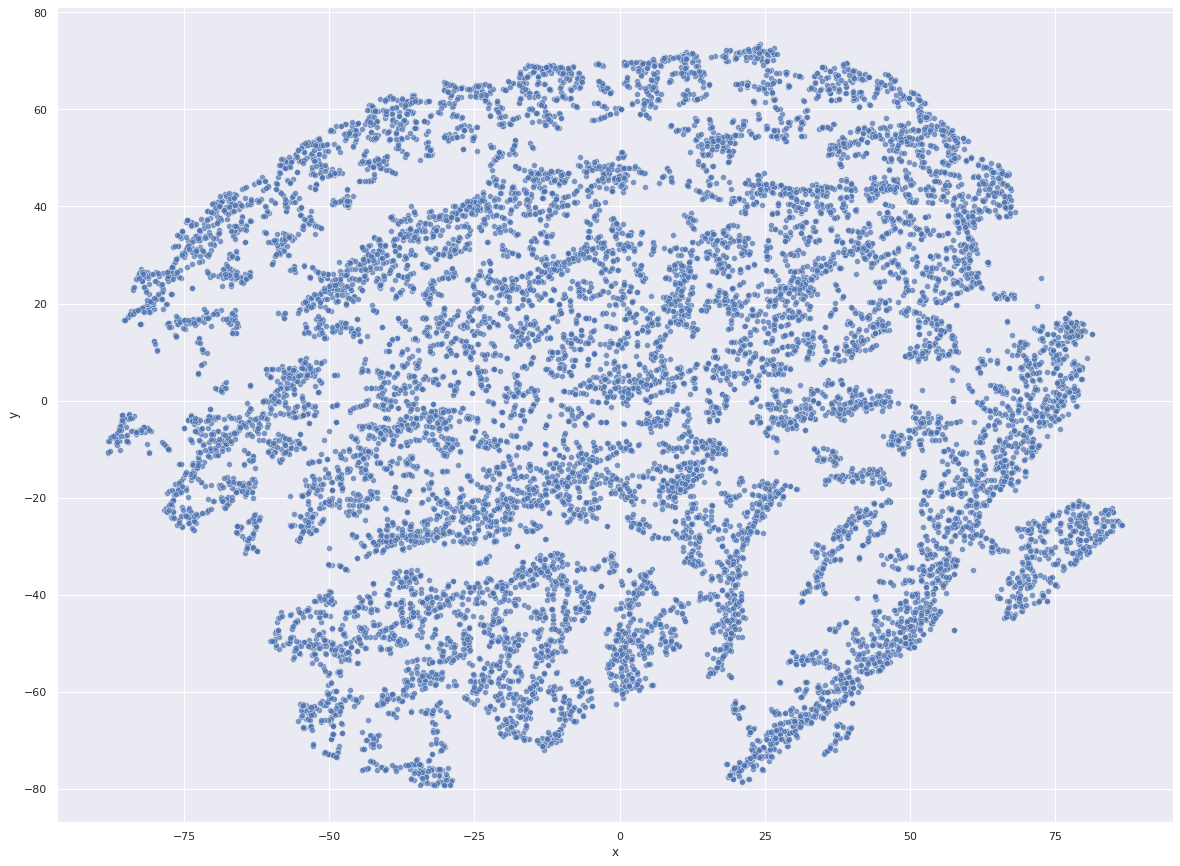

In [8]:
g = sns.scatterplot(data=df,x='x',y='y' ,alpha = 0.7)
g.figure.set_size_inches(20,15)

# Cluster with two components

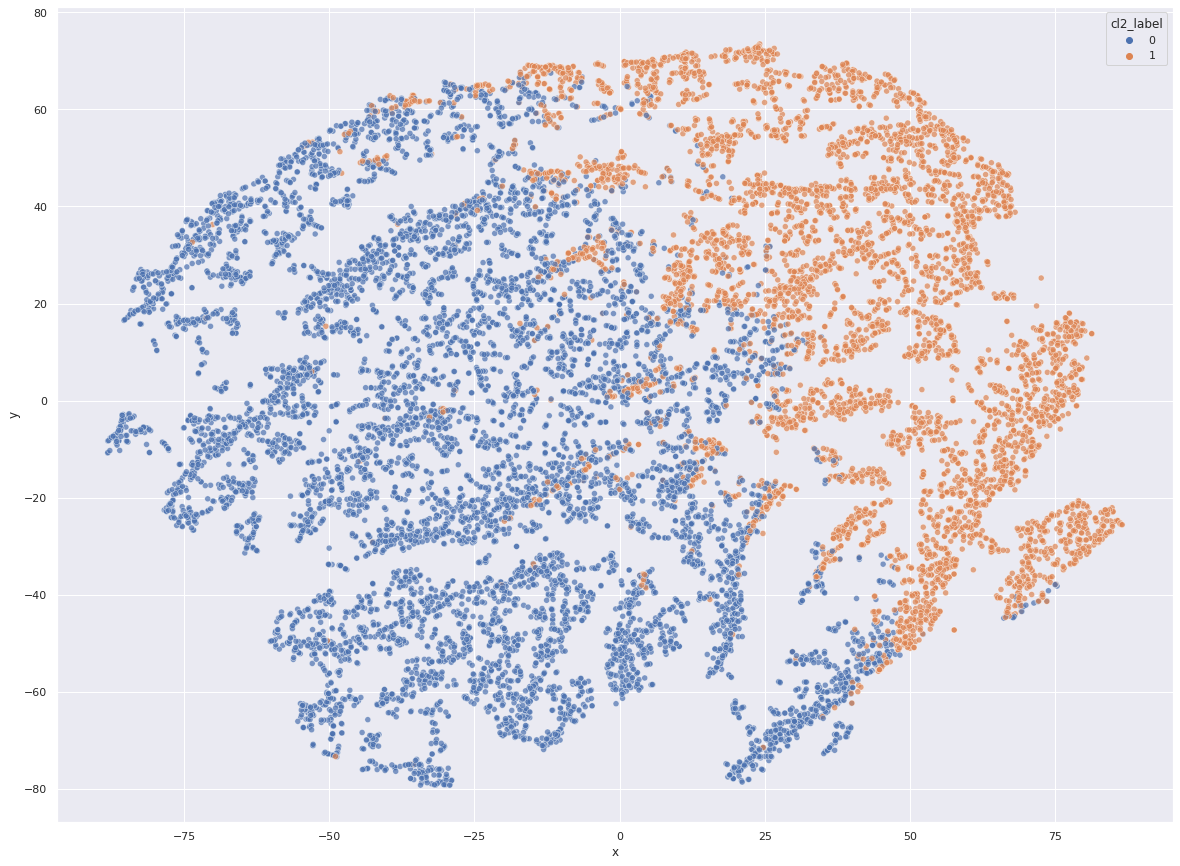

In [9]:
g = sns.scatterplot(data=df,x='x',y='y', hue="cl2_label" ,alpha = 0.7)
g.figure.set_size_inches(20,15)

# Cluster with Three components

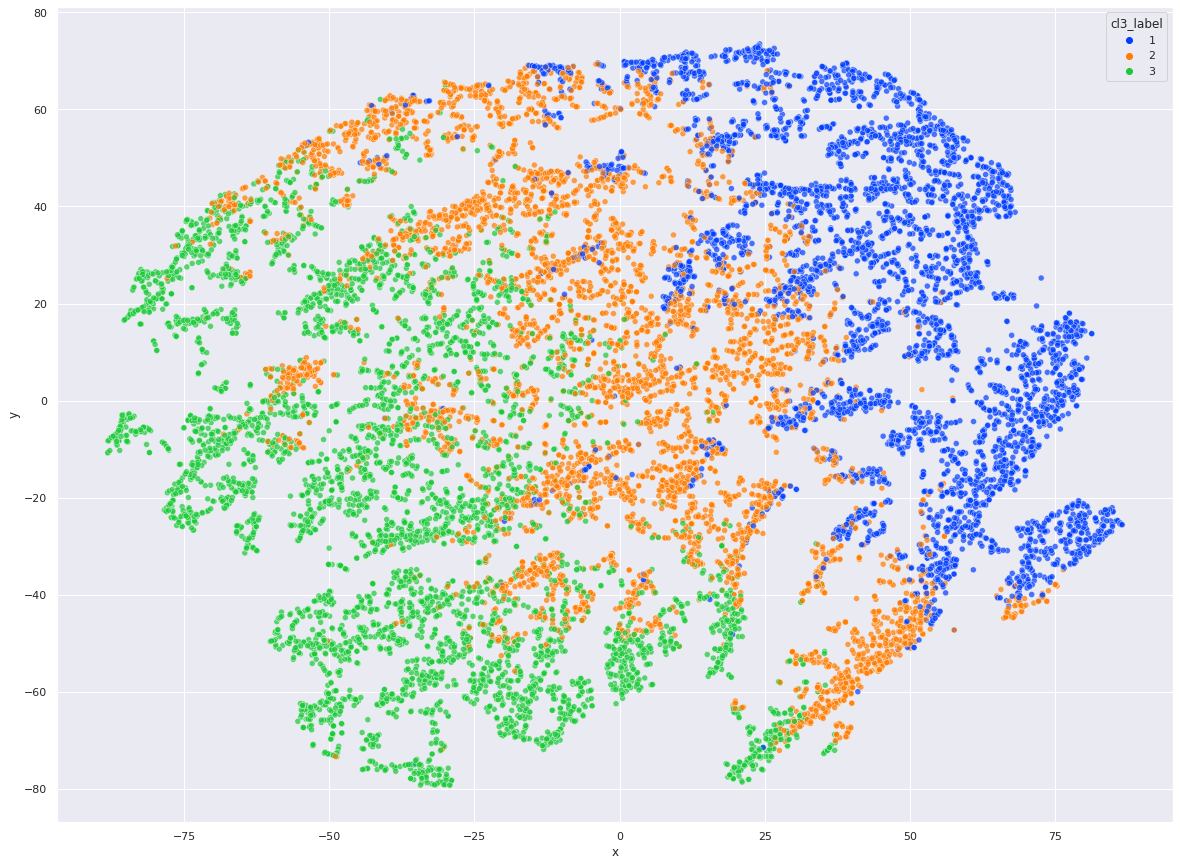

In [26]:
g = sns.scatterplot(data=df,x='x',y='y', hue="cl3_label" ,alpha = 0.7, palette="bright")
g.figure.set_size_inches(20,15)

# Using a log scale

In [11]:
for col in data2.columns[1:12] :
    data2[col] = np.log(data2[col]+1)

# Small unsupervised analysis with Log Scale

In [12]:
%%time
from sklearn.manifold import TSNE
X = data2[data2.columns[1:12]].values
X_embedded2 = TSNE(n_components=2).fit_transform(X)

CPU times: user 7min 30s, sys: 7.25 s, total: 7min 38s
Wall time: 1min 1s


In [13]:
df2 = pd.DataFrame({
    'x':X_embedded2[:,0],
    'y':X_embedded2[:,1], 
    'cl2_label':data2.cl2_label.values,
    'cl3_label':data2.cl3_label.values
})
df2.head()

x          y  cl2_label  cl3_label
0 -43.530518 -30.750895          0          2
1  -7.507779 -65.619331          0          3
2 -44.187046 -26.511013          0          2
3   0.953019 -13.200664          0          2
4 -28.082029 -61.217590          0          3

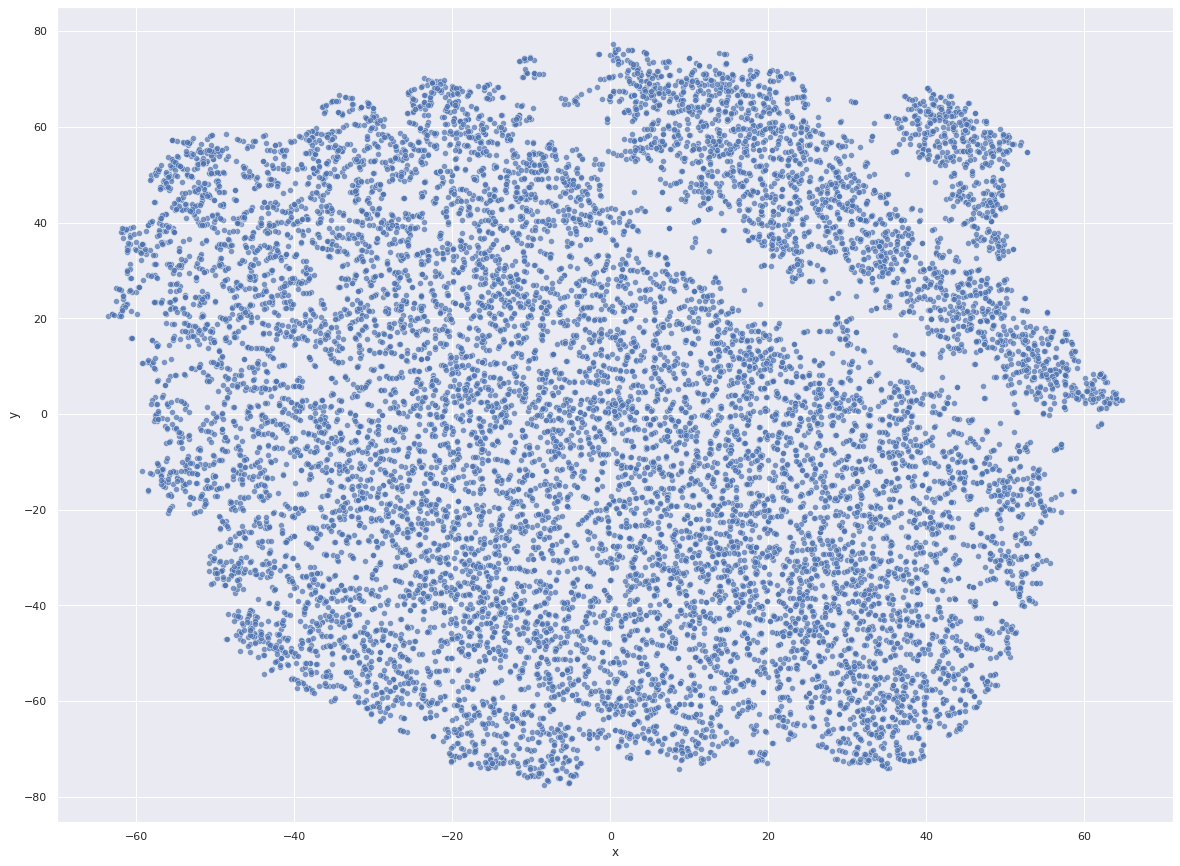

In [14]:
g = sns.scatterplot(data=df2,x='x',y='y' ,alpha = 0.7)
g.figure.set_size_inches(20,15)

# Cluster with two components

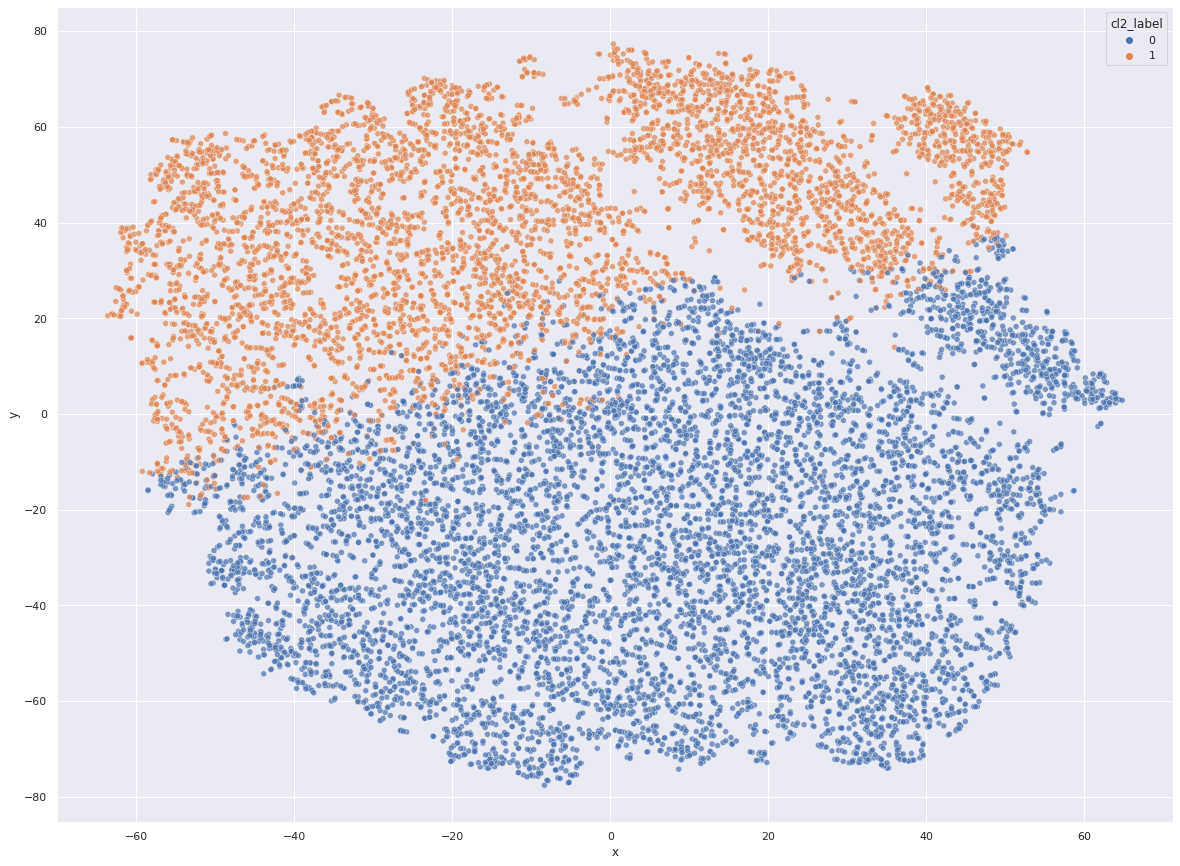

In [15]:
g = sns.scatterplot(data=df2,x='x',y='y', hue="cl2_label" ,alpha = 0.7)
g.figure.set_size_inches(20,15)

# Cluster with Three components

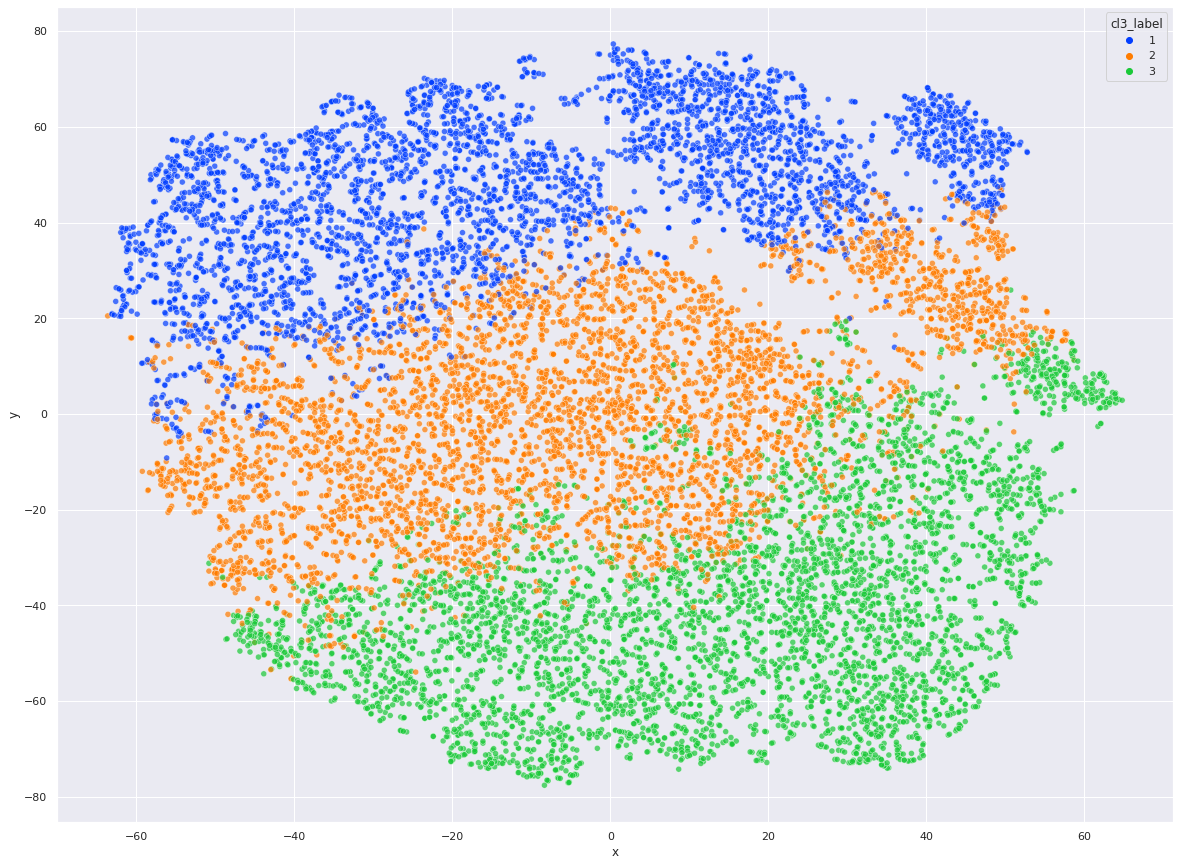

In [16]:
g = sns.scatterplot(data=df2,x='x',y='y', hue="cl3_label" ,alpha = 0.7, palette="bright")
g.figure.set_size_inches(20,15)

# PCA with Log Scale

In [17]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X)

In [22]:
df3 = pd.DataFrame({
    'x':X_pca[:,0],
    'y':X_pca[:,1], 
    'cl2_label':data2.cl2_label.values,
    'cl3_label':data2.cl3_label.values
})
#df3 = df3[(df3.x<0) & (df3.y> -1000)]
df3.head()

x         y  cl2_label  cl3_label
0 -0.023959 -0.749178          0          2
1  5.117533 -0.841451          0          3
2  0.485374 -2.201786          0          2
3  1.257562  0.486896          0          2
4  5.328445  0.265987          0          3

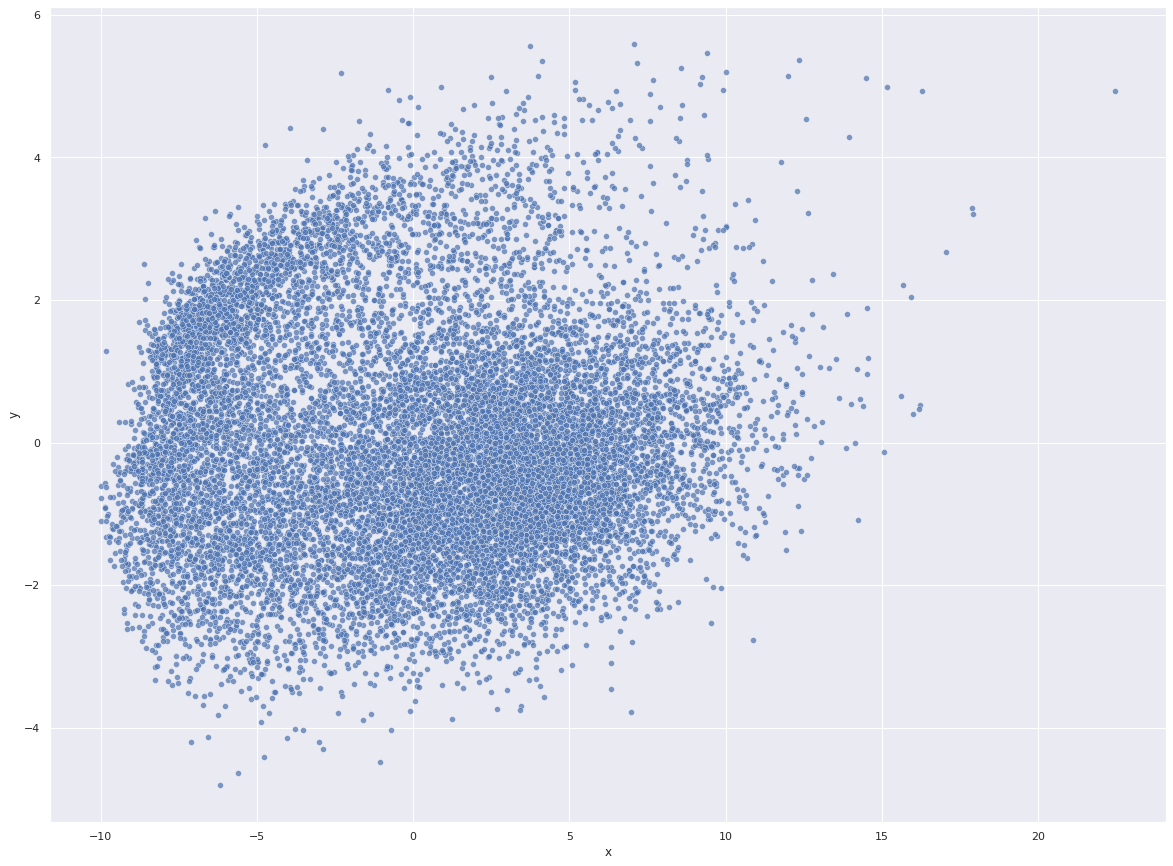

In [23]:
g = sns.scatterplot(data=df3,x='x',y='y' ,alpha = 0.7)
g.figure.set_size_inches(20,15)

# Cluster with two components

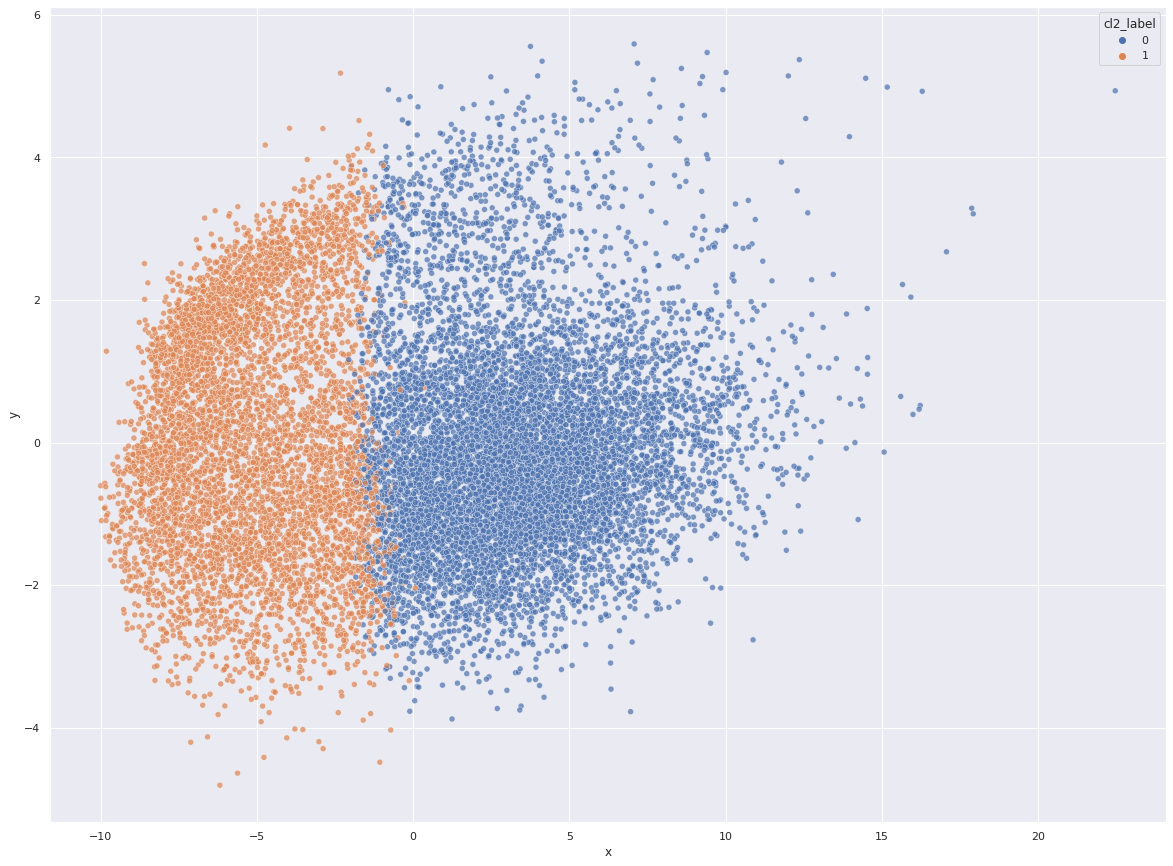

In [24]:
g = sns.scatterplot(data=df3,x='x',y='y', hue="cl2_label" ,alpha = 0.7)
g.figure.set_size_inches(20,15)

# Cluster with Three components

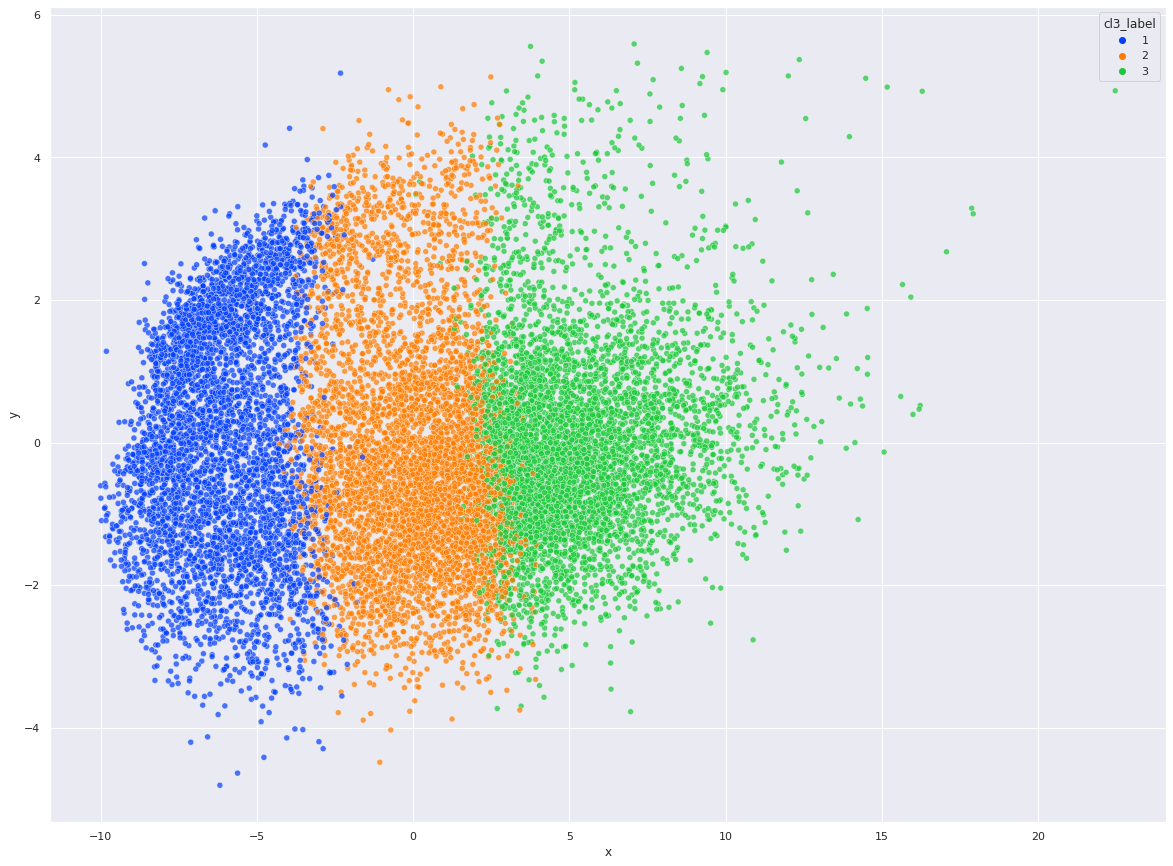

In [25]:
g = sns.scatterplot(data=df3,x='x',y='y', hue="cl3_label" ,alpha = 0.7, palette="bright")
g.figure.set_size_inches(20,15)